In [18]:
import pandas #to display dataframe
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import sklearn.metrics as metrics


df = pandas.read_csv("X:\Downloads\PRG4206 Machine Learning\shows.csv")

print(df)

#go is the potential outcome

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [4]:
d = {'UK': 0, 'USA':1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [6]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [7]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kathr\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39hcbf5309_1         968 KB  conda-forge
    pydotplus-2.0.2            |     pyhaef67bd_5          24 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         997 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhaef67bd_5 None
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 None

The following packages will be UPDATED:

  conda              pkgs/main::conda-22.9.0-py39haa95532_0 --> conda-forge::conda-22.9.0-py39hcbf5309_1 

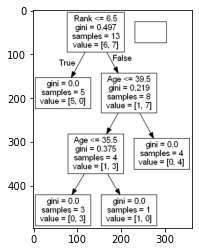

In [9]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [10]:
print(dtree.predict([[40,10,7,1],[30,3,5,2],[38,9,3,1]]))
print("--> [1] means 'GO'")
print("--> [0] means 'NO'")

[1 0 0]
--> [1] means 'GO'
--> [0] means 'NO'


C:\Users\kathr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()

clf=clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print("\n\nReport : ",classification_report(y_test, y_pred))

print("\n\nAccuracy:", metrics.accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[3 0]
 [0 1]]


Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Accuracy: 1.0


In [19]:
#optimizing decision tree
#Create Decision Tree classifier object, information gain = entropy
clf=DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train decision tree classifier
clf=clf.fit(X_train,y_train)

#predict the response for test dataset
y_pred = clf.predict(X_test)


from sklearn.metrics import confusion_matrix


print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print("\n\nReport : ",classification_report(y_test, y_pred))

print("\n\nAccuracy:", metrics.accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[3 0]
 [0 1]]


Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Accuracy: 1.0


In [17]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth =3, min_samples_leaf=5)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Confustion Matrix: \n", confusion_matrix(y_test, y_pred))

print("\n\nReport : ",classification_report(y_test, y_pred))

print("\n\nAccuracy:", metrics.accuracy_score(y_test, y_pred))

Confustion Matrix: 
 [[3 0]
 [0 1]]


Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Accuracy: 1.0
